In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [3]:
import torch
from hamiltonians.Ising import Ising
from model.model import TransformerModel

In [4]:
def gpu_setup():
    # Setup for PyTorch:
    if torch.cuda.is_available():
        torch_device = torch.device("cuda")
        print("PyTorch is using GPU {}".format(torch.cuda.current_device()))
    else:
        torch_device = torch.device("cpu")
        print("GPU unavailable; using CPU")

In [5]:
gpu_setup()
torch.set_default_device("cuda")
torch.set_default_dtype(torch.float32)

PyTorch is using GPU 0


In [6]:
os.chdir("..")

In [100]:
system_sizes = torch.arange(8, 8 + 2, 2).reshape(-1, 1)
Hamiltonians = [Ising(size, periodic=True, get_basis=True) for size in system_sizes]
data_dir_path = os.path.join("TFIM_ground_states", "h_0.6_4")
for ham in Hamiltonians:
    ham.load_dataset(
        data_dir_path,
        batch_size=1024,
        samples_in_epoch=100,
        sampling_type="shuffled",
    )

c:\Users\csmuser\anaconda3\envs\tqs2\Lib\site-packages\torch\utils\_device.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Loaded dataset for system size 8 from TFIM_ground_states\h_0.6_4\8.arrow.
(h_min, h_step, h_max) = (0.6, 0.1, 0.6).


In [9]:
param_dim = Hamiltonians[0].param_dim
embedding_size = 32
n_head = 8
n_hid = embedding_size
n_layers = 8
dropout = 0
minibatch = 10000
param_range = None
point_of_interest = None
use_SR = False

testmodel = TransformerModel(
    system_sizes,
    param_dim,
    embedding_size,
    n_head,
    n_hid,
    n_layers,
    dropout=dropout,
    minibatch=minibatch,
)

c:\Users\csmuser\anaconda3\envs\tqs2\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [10]:
testmodel.cuda()

results_dir = "results"
paper_checkpoint_name = "ckpt_100000_Ising_32_8_8_0.ckpt"
paper_checkpoint_path = os.path.join(results_dir, paper_checkpoint_name)
checkpoint = torch.load(paper_checkpoint_path)
testmodel.load_state_dict(checkpoint)

C:\Users\csmuser\AppData\Local\Temp\ipykernel_24636\1849208768.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(paper_checkpoint_path)


<All keys matched successfully>

In [11]:
ham = Hamiltonians[0]

In [12]:
dataset = ham.training_dataset
sampler = ham.sampler
for idx in sampler:
    basis, params, psi_true = dataset[idx]
    break

In [13]:
basis

tensor([[1, 1, 0,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 1, 0],
        [1, 0, 0,  ..., 0, 1, 1],
        ...,
        [1, 1, 0,  ..., 1, 1, 1],
        [1, 0, 0,  ..., 1, 0, 1],
        [0, 0, 1,  ..., 0, 0, 0]], device='cuda:0', dtype=torch.int32)

In [14]:
params

tensor([[0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0

In [15]:
psi_true

tensor([-0.0153, -0.0015, -0.0015, -0.0057, -0.0016, -0.0098, -0.0026, -0.0057,
        -0.6377, -0.0984, -0.0027, -0.0098, -0.0312, -0.0026, -0.0053, -0.0154,
        -0.0984, -0.0033, -0.0033, -0.0027, -0.0033, -0.0027, -0.0057, -0.0984,
        -0.0026, -0.0098, -0.0053, -0.0158, -0.0038, -0.0033, -0.0057, -0.0057,
        -0.0057, -0.0053, -0.0098, -0.0984, -0.0033, -0.0053, -0.0158, -0.0312,
        -0.0984, -0.0016, -0.0154, -0.0015, -0.0154, -0.0312, -0.0027, -0.0016,
        -0.0053, -0.0038, -0.0057, -0.0026, -0.0057, -0.0015, -0.0038, -0.0008,
        -0.0015, -0.0057, -0.0158, -0.0027, -0.0027, -0.0312, -0.0038, -0.0015,
        -0.0057, -0.0154, -0.0984, -0.0158, -0.0984, -0.0053, -0.0053, -0.0137,
        -0.0053, -0.0057, -0.0154, -0.0029, -0.0057, -0.0057, -0.0153, -0.0137,
        -0.0098, -0.0033, -0.0984, -0.0153, -0.0057, -0.0057, -0.0015, -0.0312,
        -0.0312, -0.0057, -0.0026, -0.0053, -0.0038, -0.0098, -0.0154, -0.0158,
        -0.0312, -0.0053, -0.0038, -0.01

In [38]:
from model.model_utils import compute_psi

In [40]:
basis

tensor([[1, 1, 0,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 1, 0],
        [1, 0, 0,  ..., 0, 1, 1],
        ...,
        [1, 1, 0,  ..., 1, 1, 1],
        [1, 0, 0,  ..., 1, 0, 1],
        [0, 0, 1,  ..., 0, 0, 0]], device='cuda:0', dtype=torch.int32)

In [41]:
params

tensor([[0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0.6000],
        [0

In [42]:
testmodel.set_param(system_size=torch.tensor([8]), param=torch.tensor([0.6]))

In [70]:
pred_log_prob, pred_log_phase = compute_psi(testmodel, ham.basis, ham.symmetry, check_duplicate=True)

In [71]:
pred_log_prob

tensor([ -1.0602,  -3.5141,  -4.7437,  -5.0163,  -4.7940,  -7.0025,  -6.7879,
         -6.0691,  -4.7914,  -7.1678,  -8.3037,  -8.2211,  -6.9982,  -8.7461,
         -7.8992,  -6.4929,  -4.7914,  -7.1818,  -8.4294,  -8.5006,  -8.4344,
        -10.3971,  -9.9046,  -8.7059,  -7.0483,  -9.1482, -10.1373,  -9.1653,
         -8.3974,  -9.3298,  -8.0849,  -6.0691,  -4.7940,  -7.1545,  -8.5130,
         -8.6269,  -8.4947, -10.5036, -10.2752,  -9.1653,  -8.4344, -10.5361,
        -11.7709, -10.9818, -10.2928, -11.3451, -10.3481,  -8.2211,  -6.9982,
         -9.0770, -10.4187,  -9.7758, -10.2928, -11.4286, -10.7434,  -8.5006,
         -8.3974,  -9.8487, -10.6891,  -8.6269,  -8.9056,  -8.7599,  -7.7081,
         -5.0163,  -4.7437,  -7.2716,  -8.5403,  -8.7599,  -8.5130, -10.6307,
        -10.3147,  -9.3298,  -8.4294, -10.6917, -11.8691, -11.3451, -10.4187,
        -11.7181, -10.7560,  -8.7461,  -8.3037, -10.5022, -11.8691, -11.4286,
        -11.7709, -13.1761, -12.5238, -10.3971, -10.1373, -11.65

In [72]:
pred_psi = ((pred_log_prob + 1j * pred_log_phase) * 0.5).exp()

In [73]:
pred_psi

tensor([ 0.5870-0.0430j, -0.1721+0.0127j, -0.0930+0.0071j,  0.0812-0.0060j,
        -0.0908+0.0066j,  0.0301-0.0023j,  0.0335-0.0024j, -0.0480+0.0035j,
        -0.0909+0.0065j,  0.0277-0.0020j,  0.0157-0.0013j, -0.0164+0.0012j,
         0.0302-0.0021j, -0.0126+0.0009j, -0.0192+0.0014j,  0.0388-0.0028j,
        -0.0909+0.0065j,  0.0275-0.0020j,  0.0147-0.0011j, -0.0142+0.0011j,
         0.0147-0.0011j, -0.0055+0.0004j, -0.0070+0.0005j,  0.0128-0.0008j,
         0.0294-0.0020j, -0.0103+0.0007j, -0.0063+0.0005j,  0.0102-0.0007j,
        -0.0150+0.0010j,  0.0094-0.0007j,  0.0175-0.0014j, -0.0480+0.0035j,
        -0.0908+0.0066j,  0.0279-0.0021j,  0.0141-0.0011j, -0.0133+0.0010j,
         0.0143-0.0010j, -0.0052+0.0004j, -0.0059+0.0004j,  0.0102-0.0007j,
         0.0147-0.0011j, -0.0051+0.0004j, -0.0028+0.0002j,  0.0041-0.0003j,
        -0.0058+0.0004j,  0.0034-0.0002j,  0.0056-0.0004j, -0.0164+0.0012j,
         0.0302-0.0021j, -0.0107+0.0008j, -0.0055+0.0004j,  0.0075-0.0005j,
        -0.0

In [74]:
pred_prob = pred_psi.abs().pow(2)

In [75]:
pred_prob

tensor([3.4640e-01, 2.9775e-02, 8.7064e-03, 6.6291e-03, 8.2793e-03, 9.0958e-04,
        1.1273e-03, 2.3131e-03, 8.3012e-03, 7.7103e-04, 2.4760e-04, 2.6892e-04,
        9.1354e-04, 1.5908e-04, 3.7103e-04, 1.5141e-03, 8.3012e-03, 7.6033e-04,
        2.1834e-04, 2.0334e-04, 2.1727e-04, 3.0522e-05, 4.9942e-05, 1.6561e-04,
        8.6889e-04, 1.0641e-04, 3.9576e-05, 1.0460e-04, 2.2544e-04, 8.8740e-05,
        3.0815e-04, 2.3131e-03, 8.2793e-03, 7.8136e-04, 2.0083e-04, 1.7922e-04,
        2.0454e-04, 2.7438e-05, 3.4477e-05, 1.0460e-04, 2.1727e-04, 2.6561e-05,
        7.7262e-06, 1.7008e-05, 3.3877e-05, 1.1827e-05, 3.2055e-05, 2.6892e-04,
        9.1354e-04, 1.1427e-04, 2.9868e-05, 5.6811e-05, 3.3877e-05, 1.0880e-05,
        2.1586e-05, 2.0334e-04, 2.2544e-04, 5.2817e-05, 2.2792e-05, 1.7922e-04,
        1.3563e-04, 1.5690e-04, 4.4917e-04, 6.6291e-03, 8.7064e-03, 6.9502e-04,
        1.9543e-04, 1.5690e-04, 2.0083e-04, 2.4163e-05, 3.3141e-05, 8.8740e-05,
        2.1834e-04, 2.2732e-05, 7.0038e-

In [76]:
pred_prob = pred_prob.cpu()

In [95]:
pred_prob.sqrt()

tensor([0.5886, 0.1726, 0.0933, 0.0814, 0.0910, 0.0302, 0.0336, 0.0481, 0.0911,
        0.0278, 0.0157, 0.0164, 0.0302, 0.0126, 0.0193, 0.0389, 0.0911, 0.0276,
        0.0148, 0.0143, 0.0147, 0.0055, 0.0071, 0.0129, 0.0295, 0.0103, 0.0063,
        0.0102, 0.0150, 0.0094, 0.0176, 0.0481, 0.0910, 0.0280, 0.0142, 0.0134,
        0.0143, 0.0052, 0.0059, 0.0102, 0.0147, 0.0052, 0.0028, 0.0041, 0.0058,
        0.0034, 0.0057, 0.0164, 0.0302, 0.0107, 0.0055, 0.0075, 0.0058, 0.0033,
        0.0046, 0.0143, 0.0150, 0.0073, 0.0048, 0.0134, 0.0116, 0.0125, 0.0212,
        0.0814, 0.0933, 0.0264, 0.0140, 0.0125, 0.0142, 0.0049, 0.0058, 0.0094,
        0.0148, 0.0048, 0.0026, 0.0034, 0.0055, 0.0029, 0.0046, 0.0126, 0.0157,
        0.0052, 0.0026, 0.0033, 0.0028, 0.0014, 0.0019, 0.0055, 0.0063, 0.0030,
        0.0019, 0.0052, 0.0048, 0.0049, 0.0077, 0.0302, 0.0336, 0.0121, 0.0058,
        0.0073, 0.0059, 0.0030, 0.0037, 0.0103, 0.0071, 0.0033, 0.0019, 0.0052,
        0.0046, 0.0048, 0.0068, 0.0278, 

In [78]:
pred_prob_numpy = pred_prob.detach().numpy()

In [79]:
import numpy as np

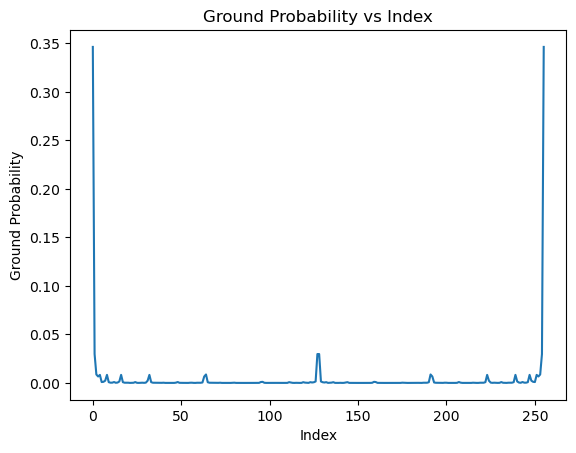

In [80]:
import matplotlib.pyplot as plt

index = np.arange(pred_prob.shape[0])
plt.plot(index, pred_prob_numpy)
plt.xlabel('Index')
plt.ylabel('Ground Probability')
plt.title('Ground Probability vs Index')
plt.show()

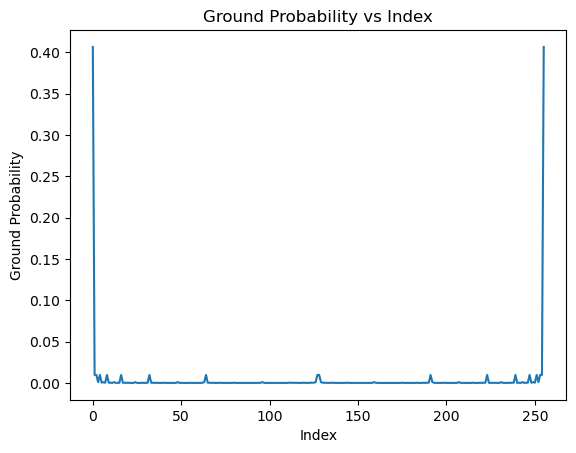

In [37]:
import matplotlib.pyplot as plt

index = torch.arange(len(ground_prob)).cpu()
plt.plot(index, ground_prob.cpu().numpy())
plt.xlabel('Index')
plt.ylabel('Ground Probability')
plt.title('Ground Probability vs Index')
plt.show()

In [85]:
pred_log_phase

tensor([-0.1461,  6.1363,  6.1315, -0.1468,  6.1388, -0.1557, -0.1434,  6.1380,
         6.1406, -0.1470, -0.1596,  6.1358, -0.1374,  6.1452,  6.1336, -0.1418,
         6.1406, -0.1459, -0.1511,  6.1338, -0.1443,  6.1359,  6.1390, -0.1283,
        -0.1375,  6.1522,  6.1355, -0.1393,  6.1516, -0.1401, -0.1567,  6.1380,
         6.1388, -0.1521, -0.1575,  6.1318, -0.1432,  6.1316,  6.1390, -0.1393,
        -0.1443,  6.1288,  6.1241, -0.1402,  6.1510, -0.1312, -0.1565,  6.1358,
        -0.1374,  6.1403,  6.1424, -0.1249,  6.1510, -0.1514, -0.1609,  6.1338,
         6.1516, -0.1505, -0.1603,  6.1318, -0.1437,  6.1328,  6.1325, -0.1468,
         6.1315, -0.1667, -0.1624,  6.1328, -0.1575,  6.1223,  6.1247, -0.1401,
        -0.1511,  6.1214,  6.1260, -0.1312,  6.1424, -0.1416, -0.1594,  6.1452,
        -0.1596,  6.1084,  6.1260, -0.1514,  6.1241, -0.1663, -0.1693,  6.1359,
         6.1355, -0.1468, -0.1686,  6.1316, -0.1603,  6.1223,  6.1121, -0.1557,
        -0.1434,  6.1237,  6.1247, -0.15

In [96]:
pred_log_phase * 0.5

tensor([-0.0731,  3.0682,  3.0657, -0.0734,  3.0694, -0.0778, -0.0717,  3.0690,
         3.0703, -0.0735, -0.0798,  3.0679, -0.0687,  3.0726,  3.0668, -0.0709,
         3.0703, -0.0729, -0.0756,  3.0669, -0.0721,  3.0679,  3.0695, -0.0641,
        -0.0688,  3.0761,  3.0678, -0.0696,  3.0758, -0.0701, -0.0784,  3.0690,
         3.0694, -0.0760, -0.0787,  3.0659, -0.0716,  3.0658,  3.0695, -0.0696,
        -0.0721,  3.0644,  3.0620, -0.0701,  3.0755, -0.0656, -0.0782,  3.0679,
        -0.0687,  3.0702,  3.0712, -0.0624,  3.0755, -0.0757, -0.0805,  3.0669,
         3.0758, -0.0752, -0.0801,  3.0659, -0.0718,  3.0664,  3.0662, -0.0734,
         3.0657, -0.0833, -0.0812,  3.0664, -0.0787,  3.0612,  3.0623, -0.0701,
        -0.0756,  3.0607,  3.0630, -0.0656,  3.0712, -0.0708, -0.0797,  3.0726,
        -0.0798,  3.0542,  3.0630, -0.0757,  3.0620, -0.0831, -0.0847,  3.0679,
         3.0678, -0.0734, -0.0843,  3.0658, -0.0801,  3.0612,  3.0561, -0.0778,
        -0.0717,  3.0618,  3.0623, -0.07

In [101]:
ham.dataset[ham.dataset["h"] == 0.6]

,N,h,energy,state
0,8,0.6,-8.740834,"[-0.637720147986433, 0.0984260538964208, 0.098..."


In [102]:
dataset_state = ham.dataset[ham.dataset["h"] == 0.6].iloc[0]["state"]

In [103]:
dataset_state 

array([-0.63772015,  0.09842605,  0.09842605, -0.03115794,  0.09842605,
       -0.0157906 , -0.03115794,  0.01374751,  0.09842605, -0.01537462,
       -0.0157906 ,  0.00565309, -0.03115794,  0.00565309,  0.01374751,
       -0.00982136,  0.09842605, -0.01533623, -0.01537462,  0.00526889,
       -0.0157906 ,  0.0027457 ,  0.00565309, -0.00376374, -0.03115794,
        0.00526889,  0.00565309, -0.00334776,  0.01374751, -0.00376374,
       -0.00982136,  0.01374751,  0.09842605, -0.01537462, -0.01533623,
        0.00526889, -0.01537462,  0.00264117,  0.00526889, -0.00334776,
       -0.0157906 ,  0.00264117,  0.0027457 , -0.00153605,  0.00565309,
       -0.00156239, -0.00376374,  0.00565309, -0.03115794,  0.00526889,
        0.00526889, -0.00289339,  0.00565309, -0.00153605, -0.00334776,
        0.00526889,  0.01374751, -0.00334776, -0.00376374,  0.00526889,
       -0.00982136,  0.00565309,  0.01374751, -0.03115794,  0.09842605,
       -0.0157906 , -0.01537462,  0.00565309, -0.01533623,  0.00

In [81]:
hfull = ham.full_H(-0.6)

In [24]:
hfull.todense()

matrix([[-8. , -0.6, -0.6, ...,  0. ,  0. ,  0. ],
        [-0.6, -4. ,  0. , ...,  0. ,  0. ,  0. ],
        [-0.6,  0. , -4. , ...,  0. ,  0. ,  0. ],
        ...,
        [ 0. ,  0. ,  0. , ..., -4. ,  0. , -0.6],
        [ 0. ,  0. ,  0. , ...,  0. , -4. , -0.6],
        [ 0. ,  0. ,  0. , ..., -0.6, -0.6, -8. ]])

In [25]:
hfull

<256x256 sparse matrix of type '<class 'numpy.float64'>'
	with 2164 stored elements in Compressed Sparse Row format>

In [26]:
from scipy.sparse.linalg import eigsh

In [28]:
vals, vecs = eigsh(hfull, k=1, which="SA")

In [29]:
vals

array([-8.74083445])

In [31]:
ground = vecs.reshape(-1)

In [32]:
ground

array([0.63772015, 0.09842605, 0.09842605, 0.03115794, 0.09842605,
       0.0157906 , 0.03115794, 0.01374751, 0.09842605, 0.01537462,
       0.0157906 , 0.00565309, 0.03115794, 0.00565309, 0.01374751,
       0.00982136, 0.09842605, 0.01533623, 0.01537462, 0.00526889,
       0.0157906 , 0.0027457 , 0.00565309, 0.00376374, 0.03115794,
       0.00526889, 0.00565309, 0.00334776, 0.01374751, 0.00376374,
       0.00982136, 0.01374751, 0.09842605, 0.01537462, 0.01533623,
       0.00526889, 0.01537462, 0.00264117, 0.00526889, 0.00334776,
       0.0157906 , 0.00264117, 0.0027457 , 0.00153605, 0.00565309,
       0.00156239, 0.00376374, 0.00565309, 0.03115794, 0.00526889,
       0.00526889, 0.00289339, 0.00565309, 0.00153605, 0.00334776,
       0.00526889, 0.01374751, 0.00334776, 0.00376374, 0.00526889,
       0.00982136, 0.00565309, 0.01374751, 0.03115794, 0.09842605,
       0.0157906 , 0.01537462, 0.00565309, 0.01533623, 0.0027457 ,
       0.00526889, 0.00376374, 0.01537462, 0.00264117, 0.00264

In [33]:
ground_prob = torch.abs(torch.tensor(ground)) ** 2

In [ ]:
energy, psi_dataset = ham.retrieve_ground(1)

In [ ]:
psi = vecs[:, 0].reshape(-1)

In [ ]:
diff = torch.tensor(psi) - psi_dataset

In [ ]:
diff.max()

tensor(0.2584, device='cuda:0', dtype=torch.float64)

In [ ]:
torch.set_printoptions(threshold=10_000_000)

In [ ]:
print(psi_dataset)

tensor([-0.4591, -0.1292, -0.1292, -0.0774, -0.1292, -0.0404, -0.0774, -0.0607,
        -0.1292, -0.0378, -0.0404, -0.0274, -0.0774, -0.0274, -0.0607, -0.0564,
        -0.1292, -0.0375, -0.0378, -0.0246, -0.0404, -0.0137, -0.0274, -0.0247,
        -0.0774, -0.0246, -0.0274, -0.0221, -0.0607, -0.0247, -0.0564, -0.0607,
        -0.1292, -0.0378, -0.0375, -0.0246, -0.0378, -0.0128, -0.0246, -0.0221,
        -0.0404, -0.0128, -0.0137, -0.0110, -0.0274, -0.0113, -0.0247, -0.0274,
        -0.0774, -0.0246, -0.0246, -0.0192, -0.0274, -0.0110, -0.0221, -0.0246,
        -0.0607, -0.0221, -0.0247, -0.0246, -0.0564, -0.0274, -0.0607, -0.0774,
        -0.1292, -0.0404, -0.0378, -0.0274, -0.0375, -0.0137, -0.0246, -0.0247,
        -0.0378, -0.0128, -0.0128, -0.0113, -0.0246, -0.0110, -0.0221, -0.0274,
        -0.0404, -0.0137, -0.0128, -0.0110, -0.0137, -0.0060, -0.0110, -0.0137,
        -0.0274, -0.0110, -0.0113, -0.0128, -0.0247, -0.0137, -0.0274, -0.0404,
        -0.0774, -0.0274, -0.0246, -0.02

In [ ]:
print(torch.tensor(psi))

tensor([-0.4591,  0.1292,  0.1292, -0.0774,  0.1292, -0.0404, -0.0774,  0.0607,
         0.1292, -0.0378, -0.0404,  0.0274, -0.0774,  0.0274,  0.0607, -0.0564,
         0.1292, -0.0375, -0.0378,  0.0246, -0.0404,  0.0137,  0.0274, -0.0247,
        -0.0774,  0.0246,  0.0274, -0.0221,  0.0607, -0.0247, -0.0564,  0.0607,
         0.1292, -0.0378, -0.0375,  0.0246, -0.0378,  0.0128,  0.0246, -0.0221,
        -0.0404,  0.0128,  0.0137, -0.0110,  0.0274, -0.0113, -0.0247,  0.0274,
        -0.0774,  0.0246,  0.0246, -0.0192,  0.0274, -0.0110, -0.0221,  0.0246,
         0.0607, -0.0221, -0.0247,  0.0246, -0.0564,  0.0274,  0.0607, -0.0774,
         0.1292, -0.0404, -0.0378,  0.0274, -0.0375,  0.0137,  0.0246, -0.0247,
        -0.0378,  0.0128,  0.0128, -0.0113,  0.0246, -0.0110, -0.0221,  0.0274,
        -0.0404,  0.0137,  0.0128, -0.0110,  0.0137, -0.0060, -0.0110,  0.0137,
         0.0274, -0.0110, -0.0113,  0.0128, -0.0247,  0.0137,  0.0274, -0.0404,
        -0.0774,  0.0274,  0.0246, -0.02

In [ ]:
hfull[0:4, 0:4].todense()

matrix([[-8.,  1.,  1.,  0.],
        [ 1., -4.,  0.,  1.],
        [ 1.,  0., -4.,  1.],
        [ 0.,  1.,  1., -4.]])

In [ ]:
params = torch.tensor([[1.0]])
system_size = torch.tensor([15])
testmodel.set_param(system_size, params)

In [ ]:
from model.model_utils import compute_psi

In [ ]:
log_probs, log_phases = compute_psi(testmodel, ham.basis, ham.symmetry)

In [ ]:
log_probs

tensor([-2.0448, -3.4559, -4.3917, -4.0036, -4.5463, -5.6334, -5.2093, -4.2599,
        -4.5859, -5.8897, -6.6644, -6.0234, -5.4894, -6.2668, -5.5583, -4.3355,
        -4.5859, -5.9480, -6.8449, -6.3382, -6.8510, -7.7849, -7.2551, -6.1323,
        -5.5512, -6.7054, -7.3426, -6.4548, -5.8779, -6.4406, -5.6325, -4.2599,
        -4.5463, -5.9327, -6.8557, -6.4024, -6.9684, -7.9767, -7.5084, -6.4548,
        -6.8510, -8.0753, -8.7824, -7.9914, -7.4908, -8.1220, -7.3678, -6.0234,
        -5.4894, -6.7809, -7.6168, -6.9498, -7.4908, -8.2456, -7.6213, -6.3382,
        -5.8779, -6.9116, -7.4592, -6.4024, -5.8797, -6.3043, -5.4765, -4.0036,
        -4.3917, -5.8165, -6.7240, -6.3043, -6.8557, -7.9128, -7.4549, -6.4406,
        -6.8449, -8.1240, -8.8482, -8.1220, -7.6168, -8.3110, -7.5779, -6.2668,
        -6.6644, -8.0057, -8.8482, -8.2456, -8.7824, -9.6125, -9.0210, -7.7849,
        -7.3426, -8.4260, -8.9919, -7.9767, -7.4592, -7.9128, -7.0955, -5.6334,
        -5.2093, -6.5941, -7.4549, -6.91

In [ ]:
probs = torch.exp(log_probs)

In [ ]:
probs

tensor([1.2941e-01, 3.1558e-02, 1.2379e-02, 1.8249e-02, 1.0606e-02, 3.5764e-03,
        5.4654e-03, 1.4124e-02, 1.0195e-02, 2.7677e-03, 1.2755e-03, 2.4215e-03,
        4.1301e-03, 1.8982e-03, 3.8555e-03, 1.3095e-02, 1.0195e-02, 2.6111e-03,
        1.0648e-03, 1.7676e-03, 1.0584e-03, 4.1599e-04, 7.0654e-04, 2.1715e-03,
        3.8828e-03, 1.2242e-03, 6.4734e-04, 1.5730e-03, 2.8006e-03, 1.5955e-03,
        3.5797e-03, 1.4124e-02, 1.0606e-02, 2.6513e-03, 1.0535e-03, 1.6576e-03,
        9.4114e-04, 3.4337e-04, 5.4848e-04, 1.5730e-03, 1.0584e-03, 3.1114e-04,
        1.5342e-04, 3.3837e-04, 5.5821e-04, 2.9693e-04, 6.3124e-04, 2.4215e-03,
        4.1301e-03, 1.1352e-03, 4.9211e-04, 9.5886e-04, 5.5821e-04, 2.6242e-04,
        4.8992e-04, 1.7676e-03, 2.8006e-03, 9.9612e-04, 5.7614e-04, 1.6576e-03,
        2.7957e-03, 1.8284e-03, 4.1840e-03, 1.8249e-02, 1.2379e-02, 2.9781e-03,
        1.2017e-03, 1.8284e-03, 1.0535e-03, 3.6602e-04, 5.7860e-04, 1.5955e-03,
        1.0648e-03, 2.9633e-04, 1.4364e-

In [ ]:
amps = torch.sqrt(probs)

In [ ]:
amps

tensor([0.3597, 0.1776, 0.1113, 0.1351, 0.1030, 0.0598, 0.0739, 0.1188, 0.1010,
        0.0526, 0.0357, 0.0492, 0.0643, 0.0436, 0.0621, 0.1144, 0.1010, 0.0511,
        0.0326, 0.0420, 0.0325, 0.0204, 0.0266, 0.0466, 0.0623, 0.0350, 0.0254,
        0.0397, 0.0529, 0.0399, 0.0598, 0.1188, 0.1030, 0.0515, 0.0325, 0.0407,
        0.0307, 0.0185, 0.0234, 0.0397, 0.0325, 0.0176, 0.0124, 0.0184, 0.0236,
        0.0172, 0.0251, 0.0492, 0.0643, 0.0337, 0.0222, 0.0310, 0.0236, 0.0162,
        0.0221, 0.0420, 0.0529, 0.0316, 0.0240, 0.0407, 0.0529, 0.0428, 0.0647,
        0.1351, 0.1113, 0.0546, 0.0347, 0.0428, 0.0325, 0.0191, 0.0241, 0.0399,
        0.0326, 0.0172, 0.0120, 0.0172, 0.0222, 0.0157, 0.0226, 0.0436, 0.0357,
        0.0183, 0.0120, 0.0162, 0.0124, 0.0082, 0.0110, 0.0204, 0.0254, 0.0148,
        0.0112, 0.0185, 0.0240, 0.0191, 0.0288, 0.0598, 0.0739, 0.0370, 0.0241,
        0.0316, 0.0234, 0.0148, 0.0194, 0.0350, 0.0266, 0.0149, 0.0110, 0.0176,
        0.0221, 0.0172, 0.0256, 0.0526, 

In [ ]:
log_phases ** 0.5

tensor([-0.1827,  6.1037,  6.1033, -0.1785,  6.1047, -0.1762, -0.1782,  6.1049,
         6.1048, -0.1760, -0.1747,  6.1071, -0.1756,  6.1085,  6.1066, -0.1782,
         6.1048, -0.1746, -0.1744,  6.1089, -0.1736,  6.1124,  6.1089, -0.1762,
        -0.1755,  6.1096,  6.1100, -0.1741,  6.1059, -0.1741, -0.1751,  6.1049,
         6.1047, -0.1735, -0.1744,  6.1099, -0.1734,  6.1141,  6.1101, -0.1741,
        -0.1736,  6.1138,  6.1133, -0.1697,  6.1107, -0.1694, -0.1726,  6.1071,
        -0.1756,  6.1115,  6.1102, -0.1744,  6.1107, -0.1700, -0.1714,  6.1089,
         6.1059, -0.1745, -0.1709,  6.1099, -0.1732,  6.1102,  6.1096, -0.1785,
         6.1033, -0.1741, -0.1748,  6.1102, -0.1744,  6.1128,  6.1102, -0.1741,
        -0.1744,  6.1131,  6.1147, -0.1694,  6.1102, -0.1707, -0.1711,  6.1085,
        -0.1747,  6.1136,  6.1147, -0.1700,  6.1133, -0.1681, -0.1673,  6.1124,
         6.1100, -0.1698, -0.1656,  6.1141, -0.1709,  6.1128,  6.1132, -0.1762,
        -0.1782,  6.1108,  6.1102, -0.17

In [ ]:
phases = torch.exp(1j * log_phases)

In [ ]:
phases

tensor([0.9834-0.1817j, 0.9839-0.1785j, 0.9839-0.1789j, 0.9841-0.1775j,
        0.9841-0.1775j, 0.9845-0.1753j, 0.9842-0.1772j, 0.9842-0.1773j,
        0.9841-0.1774j, 0.9846-0.1751j, 0.9848-0.1738j, 0.9845-0.1752j,
        0.9846-0.1747j, 0.9848-0.1738j, 0.9844-0.1757j, 0.9842-0.1772j,
        0.9841-0.1774j, 0.9848-0.1737j, 0.9848-0.1735j, 0.9849-0.1734j,
        0.9850-0.1727j, 0.9855-0.1699j, 0.9848-0.1735j, 0.9845-0.1753j,
        0.9846-0.1746j, 0.9850-0.1727j, 0.9850-0.1724j, 0.9849-0.1732j,
        0.9843-0.1764j, 0.9849-0.1733j, 0.9847-0.1742j, 0.9842-0.1773j,
        0.9841-0.1775j, 0.9850-0.1727j, 0.9848-0.1736j, 0.9850-0.1724j,
        0.9850-0.1725j, 0.9857-0.1682j, 0.9851-0.1722j, 0.9849-0.1732j,
        0.9850-0.1727j, 0.9857-0.1686j, 0.9856-0.1691j, 0.9856-0.1689j,
        0.9852-0.1716j, 0.9857-0.1686j, 0.9851-0.1717j, 0.9845-0.1752j,
        0.9846-0.1747j, 0.9853-0.1709j, 0.9851-0.1722j, 0.9848-0.1735j,
        0.9852-0.1716j, 0.9856-0.1691j, 0.9853-0.1706j, 0.9849-0

In [ ]:
predicted_psi = amps * phases

In [ ]:
predicted_psi

tensor([0.3537-0.0654j, 0.1748-0.0317j, 0.1095-0.0199j, 0.1329-0.0240j,
        0.1013-0.0183j, 0.0589-0.0105j, 0.0728-0.0131j, 0.1170-0.0211j,
        0.0994-0.0179j, 0.0518-0.0092j, 0.0352-0.0062j, 0.0484-0.0086j,
        0.0633-0.0112j, 0.0429-0.0076j, 0.0611-0.0109j, 0.1126-0.0203j,
        0.0994-0.0179j, 0.0503-0.0089j, 0.0321-0.0057j, 0.0414-0.0073j,
        0.0320-0.0056j, 0.0201-0.0035j, 0.0262-0.0046j, 0.0459-0.0082j,
        0.0614-0.0109j, 0.0345-0.0060j, 0.0251-0.0044j, 0.0391-0.0069j,
        0.0521-0.0093j, 0.0393-0.0069j, 0.0589-0.0104j, 0.1170-0.0211j,
        0.1013-0.0183j, 0.0507-0.0089j, 0.0320-0.0056j, 0.0401-0.0070j,
        0.0302-0.0053j, 0.0183-0.0031j, 0.0231-0.0040j, 0.0391-0.0069j,
        0.0320-0.0056j, 0.0174-0.0030j, 0.0122-0.0021j, 0.0181-0.0031j,
        0.0233-0.0041j, 0.0170-0.0029j, 0.0248-0.0043j, 0.0484-0.0086j,
        0.0633-0.0112j, 0.0332-0.0058j, 0.0219-0.0038j, 0.0305-0.0054j,
        0.0233-0.0041j, 0.0160-0.0027j, 0.0218-0.0038j, 0.0414-0

In [ ]:
amp_recovered = torch.abs(predicted_psi)

In [ ]:
amp_recovered

tensor([0.3597, 0.1776, 0.1113, 0.1351, 0.1030, 0.0598, 0.0739, 0.1188, 0.1010,
        0.0526, 0.0357, 0.0492, 0.0643, 0.0436, 0.0621, 0.1144, 0.1010, 0.0511,
        0.0326, 0.0420, 0.0325, 0.0204, 0.0266, 0.0466, 0.0623, 0.0350, 0.0254,
        0.0397, 0.0529, 0.0399, 0.0598, 0.1188, 0.1030, 0.0515, 0.0325, 0.0407,
        0.0307, 0.0185, 0.0234, 0.0397, 0.0325, 0.0176, 0.0124, 0.0184, 0.0236,
        0.0172, 0.0251, 0.0492, 0.0643, 0.0337, 0.0222, 0.0310, 0.0236, 0.0162,
        0.0221, 0.0420, 0.0529, 0.0316, 0.0240, 0.0407, 0.0529, 0.0428, 0.0647,
        0.1351, 0.1113, 0.0546, 0.0347, 0.0428, 0.0325, 0.0191, 0.0241, 0.0399,
        0.0326, 0.0172, 0.0120, 0.0172, 0.0222, 0.0157, 0.0226, 0.0436, 0.0357,
        0.0183, 0.0120, 0.0162, 0.0124, 0.0082, 0.0110, 0.0204, 0.0254, 0.0148,
        0.0112, 0.0185, 0.0240, 0.0191, 0.0288, 0.0598, 0.0739, 0.0370, 0.0241,
        0.0316, 0.0234, 0.0148, 0.0194, 0.0350, 0.0266, 0.0149, 0.0110, 0.0176,
        0.0221, 0.0172, 0.0256, 0.0526, 

In [ ]:
phases_recovered = torch.angle(predicted_psi)

In [ ]:
phases_recovered

tensor([-0.1827, -0.1795, -0.1798, -0.1785, -0.1785, -0.1762, -0.1782, -0.1783,
        -0.1784, -0.1760, -0.1747, -0.1761, -0.1756, -0.1746, -0.1766, -0.1782,
        -0.1784, -0.1746, -0.1744, -0.1743, -0.1736, -0.1708, -0.1743, -0.1762,
        -0.1755, -0.1736, -0.1732, -0.1741, -0.1773, -0.1741, -0.1751, -0.1783,
        -0.1785, -0.1735, -0.1744, -0.1732, -0.1734, -0.1690, -0.1731, -0.1741,
        -0.1736, -0.1694, -0.1699, -0.1697, -0.1725, -0.1694, -0.1726, -0.1761,
        -0.1756, -0.1717, -0.1730, -0.1744, -0.1725, -0.1700, -0.1714, -0.1743,
        -0.1773, -0.1745, -0.1709, -0.1732, -0.1732, -0.1730, -0.1736, -0.1785,
        -0.1798, -0.1741, -0.1748, -0.1730, -0.1744, -0.1704, -0.1730, -0.1741,
        -0.1744, -0.1700, -0.1685, -0.1694, -0.1730, -0.1707, -0.1711, -0.1746,
        -0.1747, -0.1696, -0.1685, -0.1700, -0.1699, -0.1681, -0.1673, -0.1708,
        -0.1732, -0.1698, -0.1656, -0.1690, -0.1709, -0.1704, -0.1700, -0.1762,
        -0.1782, -0.1724, -0.1730, -0.17

In [ ]:
log_amps = log_probs / 2

In [ ]:
((log_probs + 1j * log_phases) / 2).exp()

tensor([ 0.3582-0.0328j, -0.1769+0.0159j, -0.1108+0.0100j,  0.1346-0.0120j,
        -0.1026+0.0092j,  0.0596-0.0053j,  0.0736-0.0066j, -0.1184+0.0106j,
        -0.1006+0.0090j,  0.0524-0.0046j,  0.0356-0.0031j, -0.0490+0.0043j,
         0.0640-0.0056j, -0.0434+0.0038j, -0.0619+0.0055j,  0.1140-0.0102j,
        -0.1006+0.0090j,  0.0509-0.0045j,  0.0325-0.0028j, -0.0419+0.0037j,
         0.0324-0.0028j, -0.0203+0.0017j, -0.0265+0.0023j,  0.0464-0.0041j,
         0.0621-0.0055j, -0.0349+0.0030j, -0.0253+0.0022j,  0.0395-0.0034j,
        -0.0527+0.0047j,  0.0398-0.0035j,  0.0596-0.0052j, -0.1184+0.0106j,
        -0.1026+0.0092j,  0.0513-0.0045j,  0.0323-0.0028j, -0.0406+0.0035j,
         0.0306-0.0027j, -0.0185+0.0016j, -0.0233+0.0020j,  0.0395-0.0034j,
         0.0324-0.0028j, -0.0176+0.0015j, -0.0123+0.0011j,  0.0183-0.0016j,
        -0.0235+0.0020j,  0.0172-0.0015j,  0.0250-0.0022j, -0.0490+0.0043j,
         0.0640-0.0056j, -0.0336+0.0029j, -0.0221+0.0019j,  0.0308-0.0027j,
        -0.0